# [실습2] 데이터 전처리


---

## 실습 목표
---
- 범주형 데이터와 수치형 데이터의 전처리 방법을 배워봅니다.
- 피쳐 엔지니어링 기법을 이해하고, 금속분말 데이터셋을 전처리해봅니다.
- 전체 데이터를 학습용, 검증용, 테스트용으로 나누는 과정을 학습합니다.
- 데이터를 머신러닝 학습에 이용할 수 있도록 정제하고 저장해봅니다.

## 실습 목차
---
1. **범주형 데이터 전처리:** 범주형 데이터의 전처리를 해봅니다.

2. **수치형 데이터 전처리:** 수치형 데이터의 전처리를 해봅니다.

3. **피쳐 엔지니어링:** 피쳐 엔지니어링을 이해하고 직접 수행해봅니다.

4. **금속 분말 데이터 전처리:** 금속분말 데이터셋의 피쳐 엔지니어링을 수행해봅니다..

5. **Numpy array 형식으로 변환:** Pandas Dataframe 형식의 데이터를 Numpy array 형식으로 변환해봅니다.

## 실습 개요
---

이번 실습에서는 데이터 전처리에 대해 알아보고, 금속분말 데이터셋의 전처리를 직접 수행해보겠습니다.

## 1. 범주형 데이터 전처리
---
범주형 데이터는 명목형 데이터와 순위형 데이터로 분류될 수 있는 데이터입니다. titnaic 데이터 속 범주형 데이터를 전처리해보겠습니다.

### 1.1 라이브러리 불러오기

In [1]:
import pandas as pd

### 1.2 데이터 읽어오기

타이타닉 데이터를 읽어옵니다.

In [2]:
titanic = pd.read_csv('./Data/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


범주형 데이터인 성별 데이터를 전처리해보겠습니다.

In [6]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [7]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### 1.3 수치 매핑 변환

남자는 0, 여자는 1로 수치 매핑해봅니다.

In [8]:
titanic['SexMapping'] = titanic['Sex'].replace({'male': 0, 'female': 1})

/tmp/ipykernel_62/3528532538.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['SexMapping'] = titanic['Sex'].replace({'male': 0, 'female': 1})


In [9]:
titanic[['Sex', 'SexMapping']]

,Sex,SexMapping
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,1
889,male,0


### 1.4 더미 기법

다음으로, 성별 데이터를 더미 기법을 이용해서 변환해보겠습니다.

In [10]:
dummies = pd.get_dummies(titanic['Sex'])

In [11]:
dummies

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [12]:
pd.concat([titanic, dummies], axis = 1)[['Sex', 'female', 'male']]

,Sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True
...,...,...,...
886,male,False,True
887,female,True,False
888,female,True,False
889,male,False,True


**[TODO] 같은 방식으로 SibSp 를 더미기법을 활용해 변환해보세요.**

In [13]:
# SibSp 칼럼데이터를 더미기법을 활용하여 변환해봅니다.
dummies = pd.get_dummies(titanic['SibSp'])
pd.concat([titanic, dummies], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexMapping,0,1,2,3,4,5,8
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,True,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,True,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,True,False,False,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,True,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,False,True,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,True,False,False,False,False,False,False


## 2. 수치형 데이터 전처리
---
수치형 데이터는 이산형 데이터와 연속형 데이터로 분류할 수 있는 데이터입니다. 대표적인 수치형 데이터의 전처리 방법인 정규화와 표준화를 수행해보겠습니다.

### 2.1 정규화

연속형 수치형 데이터인 Fare 데이터를 전처리해보겠습니다.

In [14]:
titanic[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [15]:
# (X - min) / (max - min)
titanic['FareNormalized'] = (titanic['Fare'] - titanic['Fare'].min()) / (titanic['Fare'].max() - titanic['Fare'].min())

In [16]:
titanic[['Fare', 'FareNormalized']]

,Fare,FareNormalized
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713
...,...,...
886,13.0000,0.025374
887,30.0000,0.058556
888,23.4500,0.045771
889,30.0000,0.058556


In [17]:
print(titanic['FareNormalized'].mean())
print(titanic['FareNormalized'].min())
print(titanic['FareNormalized'].max())

0.06285842768394742
0.0
1.0


데이터과 0과 1 사이로 잘 매핑된 것을 확인할 수 있습니다. 다음으로, 정규화 전처리를 수행해보겠습니다.

### 2.2 표준화

In [18]:
# (X - X_mean) / X_std
titanic['FareStandarized'] = (titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()

In [19]:
titanic[['Fare', 'FareStandarized']]

,Fare,FareStandarized
0,7.2500,-0.502163
1,71.2833,0.786404
2,7.9250,-0.488580
3,53.1000,0.420494
4,8.0500,-0.486064
...,...,...
886,13.0000,-0.386454
887,30.0000,-0.044356
888,23.4500,-0.176164
889,30.0000,-0.044356


In [20]:
print(titanic['FareStandarized'].mean())
print(titanic['FareStandarized'].std())

-1.1961998918520205e-17
1.0


데이터의 평균은 0, 표준편차는 1을 따르도록 매핑된 것을 확인할 수 있습니다.

**[TODO] 같은 방식으로 Age 열의 데이터를 정규화와 표준화 해보세요.**

In [21]:
# Age 칼럼 데이터의 정규화
titanic['AgeNormalized'] = (titanic['Age'] - titanic['Age'].min()) / (titanic['Age'].max() - titanic['Age'].min())

In [22]:
# Age 칼럼 데이터의 표준화
titanic['AgeStandarized'] = (titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std()

## 3. 피쳐 엔지니어링
---
다음으로, titanic 데이터를 이용하여 로그 변화과 상관 분석을 수행해보겠습니다.

### 3.1 라이브러리 불러오기

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

### 3.2 로그 변환

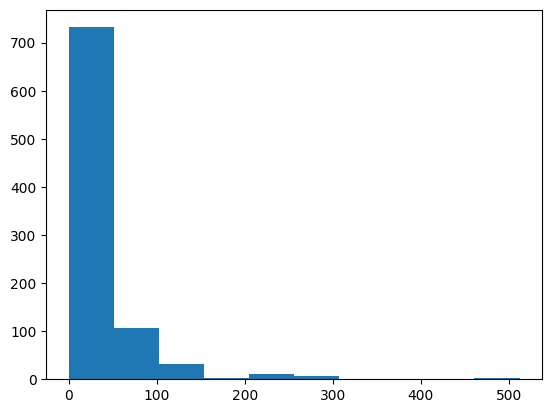

In [24]:
plt.hist(titanic['Fare'])
plt.show()

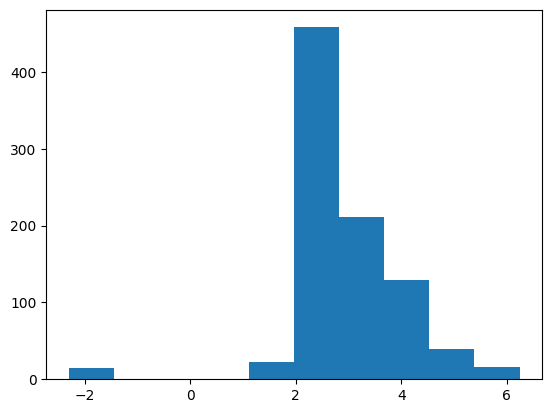

In [25]:
plt.hist(np.log(titanic['Fare'] + 1e-1))
plt.show()

로그 변환 전에는 오른쪽 꼬리가 매우 긴 모양의 분포를 띠었지만, 로그 변환 후에, 비교적 종 모양의 분포를 따르도록 변환된 것을 확인할 수 있습니다.

### 3.3 상관 분석

다음으로, titanic 데이터를 구성하는 변수들의 상관 분석을 수행해보겠습니다.

In [26]:
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexMapping,FareNormalized,FareStandarized,AgeNormalized,AgeStandarized
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.012658,0.012658,0.036847,0.036847
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.257307,0.257307,-0.077221,-0.077221
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,-0.549500,-0.549500,-0.369226,-0.369226
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.096067,0.096067,1.000000,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.159651,0.159651,-0.308247,-0.308247
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.216225,0.216225,-0.189119,-0.189119
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,1.000000,1.000000,0.096067,0.096067
SexMapping,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.182333,0.182333,-0.093254,-0.093254
FareNormalized,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,1.000000,1.000000,0.096067,0.096067
FareStandarized,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,1.000000,1.000000,0.096067,0.096067


In [27]:
titanic.corr(numeric_only=True).style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexMapping,FareNormalized,FareStandarized,AgeNormalized,AgeStandarized
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.012658,0.012658,0.036847,0.036847
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.257307,0.257307,-0.077221,-0.077221
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,-0.549500,-0.549500,-0.369226,-0.369226
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.096067,0.096067,1.000000,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.159651,0.159651,-0.308247,-0.308247
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.216225,0.216225,-0.189119,-0.189119
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,1.000000,1.000000,0.096067,0.096067
SexMapping,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.182333,0.182333,-0.093254,-0.093254
FareNormalized,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,1.000000,1.000000,0.096067,0.096067
FareStandarized,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,1.000000,1.000000,0.096067,0.096067


FareNormalized, FareStandarized, Fare 는 서로 간 상관 계수가 모두 1인 것을 확인할 수 있습니다. 즉, 실제 데이터를 사용할 때에는 셋 중에 하나의 피쳐만 선정하여 사용하는 것이 바람직하겠습니다.

### 3.4 금속분말 데이터셋의 상관분석

### 3.4.1 데이터 읽어오기

In [28]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv('./Data/continuous_factory_process.csv')

In [30]:
# 데이터의 칼럼
columns = data.columns
# 칼럼을 그룹 별로 분리
groups = list(set([group.split('.')[0] for group in columns ]))
groups.sort()
columns_group = {}
for group in groups:
    columns_group[group] = []
    i = 0
    for column in columns:
        if group in column:
            columns_group[group].append(column)
            i+=1

In [31]:
for group in groups:
    print(group)

AmbientConditions
FirstStage
Machine1
Machine2
Machine3
Machine4
Machine5
Stage1
Stage2
time_stamp


### 3.4.2 그룹 별로 상관관계 확인

In [32]:
group = groups[0]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: AmbientConditions


,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual
AmbientConditions.AmbientHumidity.U.Actual,1.000000,-0.194897
AmbientConditions.AmbientTemperature.U.Actual,-0.194897,1.000000


In [33]:
group = groups[1]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: FirstStage


,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual
FirstStage.CombinerOperation.Temperature1.U.Actual,1.000000,0.831386,0.000907
FirstStage.CombinerOperation.Temperature2.U.Actual,0.831386,1.000000,0.014107
FirstStage.CombinerOperation.Temperature3.C.Actual,0.000907,0.014107,1.000000


In [34]:
group = groups[2]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Machine1


,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual
Machine1.RawMaterial.Property1,1.000000,0.791261,-0.488885,0.830641,-0.063600,-0.232788,-0.027212,-0.596192,0.656661,-0.822290,0.087822,0.084640
Machine1.RawMaterial.Property2,0.791261,1.000000,-0.902261,0.934531,0.012647,-0.165242,-0.003882,-0.582725,0.631837,-0.869016,-0.037468,0.019587
Machine1.RawMaterial.Property3,-0.488885,-0.902261,1.000000,-0.810742,-0.047404,0.052721,-0.013448,0.418198,-0.416676,0.676234,0.175858,0.050487
Machine1.RawMaterial.Property4,0.830641,0.934531,-0.810742,1.000000,-0.019399,-0.177846,-0.007921,-0.523578,0.755921,-0.770990,0.177395,0.208380
Machine1.RawMaterialFeederParameter.U.Actual,-0.063600,0.012647,-0.047404,-0.019399,1.000000,-0.010669,0.003567,0.056099,-0.101260,0.024990,-0.079745,-0.142502
Machine1.Zone1Temperature.C.Actual,-0.232788,-0.165242,0.052721,-0.177846,-0.010669,1.000000,-0.006094,0.050832,-0.160471,0.223668,-0.278861,0.014602
Machine1.Zone2Temperature.C.Actual,-0.027212,-0.003882,-0.013448,-0.007921,0.003567,-0.006094,1.000000,-0.052928,-0.012727,-0.013011,-0.016953,0.006593
Machine1.MotorAmperage.U.Actual,-0.596192,-0.582725,0.418198,-0.523578,0.056099,0.050832,-0.052928,1.000000,-0.404427,0.675102,0.252416,-0.001304
Machine1.MotorRPM.C.Actual,0.656661,0.631837,-0.416676,0.755921,-0.101260,-0.160471,-0.012727,-0.404427,1.000000,-0.584364,0.632077,0.635053
Machine1.MaterialPressure.U.Actual,-0.822290,-0.869016,0.676234,-0.770990,0.024990,0.223668,-0.013011,0.675102,-0.584364,1.000000,0.075879,-0.000064


In [35]:
group = groups[3]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Machine2


,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual
Machine2.RawMaterial.Property1,1.000000,1.000000,-1.000000,-1.000000,-0.048174,0.038798,-0.065566,0.720414,0.005109,-0.483194,0.531945,-0.011232
Machine2.RawMaterial.Property2,1.000000,1.000000,-1.000000,-1.000000,-0.048174,0.038798,-0.065566,0.720414,0.005109,-0.483194,0.531945,-0.011232
Machine2.RawMaterial.Property3,-1.000000,-1.000000,1.000000,1.000000,0.048174,-0.038798,0.065566,-0.720414,-0.005109,0.483194,-0.531945,0.011232
Machine2.RawMaterial.Property4,-1.000000,-1.000000,1.000000,1.000000,0.048174,-0.038798,0.065566,-0.720414,-0.005109,0.483194,-0.531945,0.011232
Machine2.RawMaterialFeederParameter.U.Actual,-0.048174,-0.048174,0.048174,0.048174,1.000000,0.040888,0.046573,-0.042872,-0.031535,0.002904,-0.129721,-0.002876
Machine2.Zone1Temperature.C.Actual,0.038798,0.038798,-0.038798,-0.038798,0.040888,1.000000,-0.005742,0.026504,-0.000530,0.068510,-0.153892,0.007951
Machine2.Zone2Temperature.C.Actual,-0.065566,-0.065566,0.065566,0.065566,0.046573,-0.005742,1.000000,-0.065434,0.018123,0.144502,-0.229479,0.008525
Machine2.MotorAmperage.U.Actual,0.720414,0.720414,-0.720414,-0.720414,-0.042872,0.026504,-0.065434,1.000000,-0.000091,-0.434077,0.510376,-0.005994
Machine2.MotorRPM.C.Actual,0.005109,0.005109,-0.005109,-0.005109,-0.031535,-0.000530,0.018123,-0.000091,1.000000,0.130171,-0.006709,0.012513
Machine2.MaterialPressure.U.Actual,-0.483194,-0.483194,0.483194,0.483194,0.002904,0.068510,0.144502,-0.434077,0.130171,1.000000,-0.636800,0.023699


In [36]:
group = groups[4]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Machine3


,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
Machine3.RawMaterial.Property1,1.000000,-0.596601,-0.937122,-0.431884,0.021093,-0.000889,0.001973,0.783904,0.335767,0.483341,0.068522,0.054307
Machine3.RawMaterial.Property2,-0.596601,1.000000,0.839176,0.981495,-0.054484,-0.143090,-0.054677,-0.150213,-0.703889,0.310189,0.621859,-0.143204
Machine3.RawMaterial.Property3,-0.937122,0.839176,1.000000,0.719504,-0.037988,-0.061624,-0.025115,-0.596556,-0.533644,-0.192655,0.223995,-0.099078
Machine3.RawMaterial.Property4,-0.431884,0.981495,0.719504,1.000000,-0.056199,-0.161023,-0.060978,0.018227,-0.710948,0.463932,0.715223,-0.147981
Machine3.RawMaterialFeederParameter.U.Actual,0.021093,-0.054484,-0.037988,-0.056199,1.000000,0.051303,0.013190,0.009318,0.058405,0.004913,-0.094520,0.063328
Machine3.Zone1Temperature.C.Actual,-0.000889,-0.143090,-0.061624,-0.161023,0.051303,1.000000,0.070402,-0.029413,0.136227,-0.048868,-0.372500,0.235847
Machine3.Zone2Temperature.C.Actual,0.001973,-0.054677,-0.025115,-0.060978,0.013190,0.070402,1.000000,-0.015166,0.043384,0.003460,-0.137836,0.044252
Machine3.MotorAmperage.U.Actual,0.783904,-0.150213,-0.596556,0.018227,0.009318,-0.029413,-0.015166,1.000000,0.096305,0.750114,0.334471,0.011845
Machine3.MotorRPM.C.Actual,0.335767,-0.703889,-0.533644,-0.710948,0.058405,0.136227,0.043384,0.096305,1.000000,-0.354924,-0.476871,0.112157
Machine3.MaterialPressure.U.Actual,0.483341,0.310189,-0.192655,0.463932,0.004913,-0.048868,0.003460,0.750114,-0.354924,1.000000,0.521833,0.002081


In [37]:
group = groups[5]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Machine4


,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual
Machine4.Temperature1.C.Actual,1.000000,0.790240,0.035568,-0.012670,0.035568,0.255376,-0.388182
Machine4.Temperature2.C.Actual,0.790240,1.000000,-0.084028,0.004768,-0.084028,0.255323,-0.325027
Machine4.Pressure.C.Actual,0.035568,-0.084028,1.000000,0.262120,1.000000,0.297360,-0.115519
Machine4.Temperature3.C.Actual,-0.012670,0.004768,0.262120,1.000000,0.262120,0.880580,0.540364
Machine4.Temperature4.C.Actual,0.035568,-0.084028,1.000000,0.262120,1.000000,0.297360,-0.115519
Machine4.Temperature5.C.Actual,0.255376,0.255323,0.297360,0.880580,0.297360,1.000000,0.342290
Machine4.ExitTemperature.U.Actual,-0.388182,-0.325027,-0.115519,0.540364,-0.115519,0.342290,1.000000


In [38]:
group = groups[6]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Machine5


,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature5.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual
Machine5.Temperature1.C.Actual,1.000000,0.063727,0.121090,0.023032,0.155452,-0.177697,0.277237
Machine5.Temperature2.C.Actual,0.063727,1.000000,0.073756,0.000128,-0.029196,-0.135350,0.076296
Machine5.Temperature3.C.Actual,0.121090,0.073756,1.000000,0.734220,0.234444,-0.592838,0.656945
Machine5.Temperature4.C.Actual,0.023032,0.000128,0.734220,1.000000,0.120621,0.057734,0.378651
Machine5.Temperature5.C.Actual,0.155452,-0.029196,0.234444,0.120621,1.000000,-0.242123,0.473403
Machine5.Temperature6.C.Actual,-0.177697,-0.135350,-0.592838,0.057734,-0.242123,1.000000,-0.558251
Machine5.ExitTemperature.U.Actual,0.277237,0.076296,0.656945,0.378651,0.473403,-0.558251,1.000000


In [39]:
group = groups[7]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Stage1


,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement5.U.Setpoint,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement6.U.Setpoint,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement7.U.Setpoint,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement8.U.Setpoint,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement9.U.Setpoint,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
Stage1.Output.Measurement0.U.Actual,1.000000,0.877657,0.139516,0.877657,0.639648,0.877657,0.697374,0.877657,0.598016,0.877657,0.022024,0.877657,0.053988,0.877657,0.028914,0.877657,0.294707,0.877657,0.282200,0.877657,0.443605,0.877657,-0.009701,0.877657,0.147911,0.877657,0.223559,0.877657,0.109818,0.877657
Stage1.Output.Measurement0.U.Setpoint,0.877657,1.000000,0.074619,1.000000,0.699784,1.000000,0.646918,1.000000,0.543497,1.000000,0.014112,1.000000,0.075469,1.000000,0.049864,1.000000,0.267116,1.000000,0.277246,1.000000,0.445731,1.000000,0.037642,1.000000,0.115895,1.000000,0.196916,1.000000,0.086281,1.000000
Stage1.Output.Measurement1.U.Actual,0.139516,0.074619,1.000000,0.074619,-0.025421,0.074619,0.105656,0.074619,-0.072995,0.074619,-0.025181,0.074619,0.114549,0.074619,0.197549,0.074619,-0.214421,0.074619,-0.231906,0.074619,0.145388,0.074619,-0.009586,0.074619,-0.155155,0.074619,-0.241260,0.074619,0.118804,0.074619
Stage1.Output.Measurement1.U.Setpoint,0.877657,1.000000,0.074619,1.000000,0.699784,1.000000,0.646918,1.000000,0.543497,1.000000,0.014112,1.000000,0.075469,1.000000,0.049864,1.000000,0.267116,1.000000,0.277246,1.000000,0.445731,1.000000,0.037642,1.000000,0.115895,1.000000,0.196916,1.000000,0.086281,1.000000
Stage1.Output.Measurement2.U.Actual,0.639648,0.699784,-0.025421,0.699784,1.000000,0.699784,0.571635,0.699784,0.351120,0.699784,0.009276,0.699784,0.149280,0.699784,0.124152,0.699784,0.256018,0.699784,0.255824,0.699784,0.346174,0.699784,0.143883,0.699784,-0.022003,0.699784,0.003416,0.699784,0.037177,0.699784
Stage1.Output.Measurement2.U.Setpoint,0.877657,1.000000,0.074619,1.000000,0.699784,1.000000,0.646918,1.000000,0.543497,1.000000,0.014112,1.000000,0.075469,1.000000,0.049864,1.000000,0.267116,1.000000,0.277246,1.000000,0.445731,1.000000,0.037642,1.000000,0.115895,1.000000,0.196916,1.000000,0.086281,1.000000
Stage1.Output.Measurement3.U.Actual,0.697374,0.646918,0.105656,0.646918,0.571635,0.646918,1.000000,0.646918,0.474344,0.646918,-0.022692,0.646918,0.042097,0.646918,0.065674,0.646918,0.365357,0.646918,0.218401,0.646918,0.378153,0.646918,0.038612,0.646918,0.061393,0.646918,0.138600,0.646918,0.066637,0.646918
Stage1.Output.Measurement3.U.Setpoint,0.877657,1.000000,0.074619,1.000000,0.699784,1.000000,0.646918,1.000000,0.543497,1.000000,0.014112,1.000000,0.075469,1.000000,0.049864,1.000000,0.267116,1.000000,0.277246,1.000000,0.445731,1.000000,0.037642,1.000000,0.115895,1.000000,0.196916,1.000000,0.086281,1.000000
Stage1.Output.Measurement4.U.Actual,0.598016,0.543497,-0.072995,0.543497,0.351120,0.543497,0.474344,0.543497,1.000000,0.543497,0.028523,0.543497,-0.046088,0.543497,-0.093243,0.543497,0.323128,0.543497,0.315604,0.543497,0.331852,0.543497,-0.133276,0.543497,0.274218,0.543497,0.332304,0.543497,0.080602,0.543497
Stage1.Output.Measurement4.U.Setpoint,0.877657,1.000000,0.074619,1.000000,0.699784,1.000000,0.646918,

In [40]:
group = groups[8]
print('그룹이름:',group)
data[columns_group[group]].corr(numeric_only=True).style.background_gradient()

그룹이름: Stage2


/home/elicer/.local/lib/python3.10/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/elicer/.local/lib/python3.10/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement1.U.Setpoint,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement2.U.Setpoint,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement3.U.Setpoint,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement4.U.Setpoint,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement5.U.Setpoint,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement6.U.Setpoint,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement7.U.Setpoint,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement8.U.Setpoint,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement9.U.Setpoint,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
Stage2.Output.Measurement0.U.Actual,1.000000,nan,0.432598,nan,0.593928,nan,0.280226,nan,-0.068195,nan,0.433373,nan,0.158328,nan,0.456587,nan,0.624825,nan,0.185525,nan,0.686635,nan,0.679618,nan,0.680223,nan,0.367350,nan,0.532274,nan
Stage2.Output.Measurement0.U.Setpoint,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Stage2.Output.Measurement1.U.Actual,0.432598,nan,1.000000,nan,0.714674,nan,0.165417,nan,0.180796,nan,0.384496,nan,0.113978,nan,0.528390,nan,0.529770,nan,0.238379,nan,0.552970,nan,0.565029,nan,0.556972,nan,0.396319,nan,0.648121,nan
Stage2.Output.Measurement1.U.Setpoint,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Stage2.Output.Measurement2.U.Actual,0.593928,nan,0.714674,nan,1.000000,nan,0.503949,nan,-0.245493,nan,0.565879,nan,0.312588,nan,0.692656,nan,0.747607,nan,0.196983,nan,0.781842,nan,0.776744,nan,0.787218,nan,0.543405,nan,0.673744,nan
Stage2.Output.Measurement2.U.Setpoint,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Stage2.Output.Measurement3.U.Actual,0.280226,nan,0.165417,nan,0.503949,nan,1.000000,nan,-0.353423,nan,0.421215,nan,0.280142,nan,0.532217,nan,0.421346,nan,0.119023,nan,0.386216,nan,0.377897,nan,0.400662,nan,0.496233,nan,0.259324,nan
Stage2.Output.Measurement3.U.Setpoint,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Stage2.Output.Measurement4.U.Actual,-0.068195,nan,0.180796,nan,-0.245493,nan,-0.353423,nan,1.000000,nan,-0.119398,nan,-0.329643,nan,-0.097435,nan,-0.125252,nan,0.060168,nan,-0.129271,nan,-0.104017,nan,-0.131661,nan,-0.055643,nan,0.081600,nan
Stage2.Output.Measurement4.U.Setpoint,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


변수 간 상관관계가 1 이거나, nan 인 부분을 확인할 수 있습니다. 상관관계가 1인 것은 두 변수의 선형 관계가 매우 크다는 것으로, 두 변수 중 하나만 선택하여 사용하는 것이 바람직 할 것입니다. 상관 관계가 nan으로 표시되는 것은 특정 변수의 데이터가 항상 똑같다는 것을 의미합니다. 이러한 데이터는 의미가 없으므로, 제거해줍니다.

In [41]:
invalid_columns = []
for group in groups:
    for column1 in columns_group[group]:
        if column1 in invalid_columns: continue
        for column2 in columns_group[group]:
            if column2 in invalid_columns: continue
            if column1 == column2: continue
            if data[[column1, column2]].corr(numeric_only=True)[column1][column2] > 0.9 or np.isnan(data[[column1, column2]].corr(numeric_only=True)[column1][column2]):
                invalid_columns.append(column2)
print(sorted(invalid_columns))

['Machine1.RawMaterial.Property4', 'Machine2.RawMaterial.Property2', 'Machine2.RawMaterial.Property4', 'Machine3.RawMaterial.Property4', 'Machine4.Temperature4.C.Actual', 'Stage1.Output.Measurement1.U.Setpoint', 'Stage1.Output.Measurement10.U.Setpoint', 'Stage1.Output.Measurement11.U.Setpoint', 'Stage1.Output.Measurement12.U.Setpoint', 'Stage1.Output.Measurement13.U.Setpoint', 'Stage1.Output.Measurement14.U.Setpoint', 'Stage1.Output.Measurement2.U.Setpoint', 'Stage1.Output.Measurement3.U.Setpoint', 'Stage1.Output.Measurement4.U.Setpoint', 'Stage1.Output.Measurement5.U.Setpoint', 'Stage1.Output.Measurement6.U.Setpoint', 'Stage1.Output.Measurement7.U.Setpoint', 'Stage1.Output.Measurement8.U.Setpoint', 'Stage1.Output.Measurement9.U.Actual', 'Stage1.Output.Measurement9.U.Setpoint', 'Stage2.Output.Measurement0.U.Setpoint', 'Stage2.Output.Measurement1.U.Setpoint', 'Stage2.Output.Measurement10.U.Setpoint', 'Stage2.Output.Measurement11.U.Actual', 'Stage2.Output.Measurement11.U.Setpoint', 'Stag

두 변수 간 상관 관계가 0.9 이상이거나, nan 이라면, 해당하는 변수를 제거해줍니다.

In [42]:
data = data.drop(invalid_columns, axis = 'columns')

전처리 한 데이터에 대해 다시 상관관계를 확인해보겠습니다.

**[TODO] 각 그룹별로 다시 상관관계를 확인해보세요.**

위에서 했던 과정대로, 그룹 별로 변수 간 상관관계를 확인하여 상관관계가 1이거나 nan인 것이 남아있는지 확인해봅니다.

In [43]:
# 데이터의 칼럼
columns = data.columns
# 칼럼을 그룹 별로 분리
groups = list(set([group.split('.')[0] for group in columns ]))
groups.sort()
columns_group = {}
for group in groups:
    columns_group[group] = []
    i = 0
    for column in columns:
        if group in column:
            columns_group[group].append(column)
            i+=1

상관 계수가 1이거나 nan 인 값 없이, 잘 정리된 것을 확인할 수 있습니다. 처리한 데이터를 이후의 과정에서 사용하기 수월하도록 csv 파일로 저장해줍니다.

In [44]:
data.to_csv('./Data/continuous_factory_process_pp.csv')

## 4. 데이터 분할
---
다음으로, 데이터를 학습용, 검증용, 그리고 테스트용으로 분할해보겠습니다.

In [45]:
print(data.shape)

(11270, 79)


데이터를 섞어줍니다.

In [46]:
data

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,1241.26,72.0,72.3,48.03,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1,2019-03-06 10:52:38,17.24,23.53,11.54,200,963.00,1262.73,72.1,72.4,48.70,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.00,1296.13,72.1,72.4,49.78,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
3,2019-03-06 10:52:42,17.24,23.53,11.54,200,963.00,1202.16,72.1,72.4,49.64,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,2019-03-06 10:52:43,17.24,23.53,11.54,200,963.00,1202.57,72.1,72.4,49.37,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,2019-03-06 14:47:13,13.84,24.43,12.22,201,1048.06,1258.05,72.0,71.8,73.05,...,19.35,0.0,3.13,0.31,2.98,19.35,0.0,7.88,3.86,7.60
11266,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,1263.76,72.0,71.8,73.46,...,19.07,0.0,3.09,0.23,2.97,20.08,0.0,7.87,3.80,7.56
11267,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,1255.42,72.0,71.8,73.32,...,19.11,0.0,2.94,0.21,2.97,19.57,0.0,7.85,3.79,7.76
11268,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,1257.52,72.0,71.8,73.59,...,19.42,0.0,3.03,0.27,2.96,19.18,0.0,7.93,3.83,7.66


In [47]:
np.random.seed(0)
idxs = np.arange(len(data))
np.random.shuffle(idxs)
data = data.loc[idxs]

In [48]:
data

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
9705,2019-03-06 14:15:02,13.94,24.33,11.54,200,1027.43,1254.63,72.1,72.3,70.90,...,19.58,0.0,3.22,0.38,2.98,19.83,0.00,7.87,3.92,7.62
1180,2019-03-06 11:16:50,16.73,24.00,11.54,200,963.00,1291.89,72.0,72.4,75.34,...,20.57,0.0,2.62,0.87,2.95,20.04,16.43,7.97,3.42,8.63
2503,2019-03-06 11:44:26,16.73,24.09,11.54,200,963.00,1270.02,72.0,72.6,73.73,...,20.64,0.0,2.61,0.62,2.96,19.63,16.66,7.76,3.47,7.97
9007,2019-03-06 14:00:09,13.84,24.00,12.59,236,601.11,1259.27,72.0,72.4,63.37,...,20.26,0.0,2.99,0.58,2.99,19.71,0.00,7.86,3.78,7.53
6474,2019-03-06 13:07:25,14.83,23.36,11.54,200,1027.43,1282.62,72.0,71.7,72.78,...,20.66,0.0,2.75,0.52,2.97,20.14,16.66,7.92,3.46,7.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2019-03-06 12:33:51,15.63,23.43,11.54,200,1027.43,1268.66,72.0,71.4,72.25,...,20.82,0.0,2.69,0.51,2.97,19.94,16.65,7.89,3.46,7.76
3264,2019-03-06 12:00:30,16.64,24.02,11.54,200,963.00,1262.16,72.0,71.5,72.92,...,20.63,0.0,2.65,0.56,2.99,19.10,16.71,7.87,3.41,8.25
9845,2019-03-06 14:18:01,13.94,24.33,11.54,200,1027.43,1167.25,72.0,72.4,72.38,...,19.76,0.0,2.87,0.51,2.97,19.41,16.86,7.83,3.71,8.14
10799,2019-03-06 14:37:34,14.13,24.36,12.22,201,1048.06,1244.81,72.0,71.6,72.25,...,19.18,0.0,3.01,0.35,2.98,19.63,0.00,7.81,3.82,7.75


In [49]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 1 - train_ratio - valid_ratio
print('학습용 데이터 개수:', int(len(data) * train_ratio))
print('검증용 데이터 개수:', int(len(data) * valid_ratio))
print('테스트 데이터 개수:', int(len(data)) - int(len(data) * train_ratio) - int(len(data) * valid_ratio))

학습용 데이터 개수: 9016
검증용 데이터 개수: 1127
테스트 데이터 개수: 1127


**[TODO] 인덱스를 적절히 설정하여 전체데이터를 학습용, 검증용, 테스트용으로 나누어봅니다.**

처음 train_ratio 만큼의 데이터는 학습용으로, 그 다음부터 valid_ratio 만큼의 데이터는 검증용으로, 나머지 데이터는 테스트 데이터로 사용합니다.

In [50]:
train_num = int(len(data) * train_ratio)
valid_num = int(len(data) * valid_ratio)
test_num = len(data) - train_num - valid_num

train_data = data[:train_num]
valid_data = data[train_num:train_num+valid_num]
test_data = data[train_num+valid_num:]

In [51]:
print('학습용 데이터 개수:', len(train_data))
print('검증용 데이터 개수:', len(valid_data))
print('테스트 데이터 개수:', len(test_data))

학습용 데이터 개수: 9016
검증용 데이터 개수: 1127
테스트 데이터 개수: 1127


## 5. 데이터의 Numpy array 변환
---
다음으로, 데이터를 이후의 머신러닝 학습에 사용할 수 있도록 적절히 변환해주겠습니다.

In [52]:
stage1_input_columns = []
for group in ['Machine1', 'Machine2', 'Machine3', 'FirstStage', 'AmbientConditions']:
    stage1_input_columns += columns_group[group]
print(stage1_input_columns)

['Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2', 'Machine1.RawMaterial.Property3', 'Machine1.RawMaterialFeederParameter.U.Actual', 'Machine1.Zone1Temperature.C.Actual', 'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual', 'Machine1.MotorRPM.C.Actual', 'Machine1.MaterialPressure.U.Actual', 'Machine1.MaterialTemperature.U.Actual', 'Machine1.ExitZoneTemperature.C.Actual', 'Machine2.RawMaterial.Property1', 'Machine2.RawMaterial.Property3', 'Machine2.RawMaterialFeederParameter.U.Actual', 'Machine2.Zone1Temperature.C.Actual', 'Machine2.Zone2Temperature.C.Actual', 'Machine2.MotorAmperage.U.Actual', 'Machine2.MotorRPM.C.Actual', 'Machine2.MaterialPressure.U.Actual', 'Machine2.MaterialTemperature.U.Actual', 'Machine2.ExitZoneTemperature.C.Actual', 'Machine3.RawMaterial.Property1', 'Machine3.RawMaterial.Property2', 'Machine3.RawMaterial.Property3', 'Machine3.RawMaterialFeederParameter.U.Actual', 'Machine3.Zone1Temperature.C.Actual', 'Machine3.Zone2Temperat

In [53]:
stage1_output_columns = []
for group in ['Stage1']:
    stage1_output_columns += columns_group[group]
print(stage1_output_columns)

['Stage1.Output.Measurement0.U.Actual', 'Stage1.Output.Measurement0.U.Setpoint', 'Stage1.Output.Measurement1.U.Actual', 'Stage1.Output.Measurement2.U.Actual', 'Stage1.Output.Measurement3.U.Actual', 'Stage1.Output.Measurement4.U.Actual', 'Stage1.Output.Measurement5.U.Actual', 'Stage1.Output.Measurement6.U.Actual', 'Stage1.Output.Measurement7.U.Actual', 'Stage1.Output.Measurement8.U.Actual', 'Stage1.Output.Measurement10.U.Actual', 'Stage1.Output.Measurement11.U.Actual', 'Stage1.Output.Measurement12.U.Actual', 'Stage1.Output.Measurement13.U.Actual', 'Stage1.Output.Measurement14.U.Actual']


In [54]:
stage2_input_columns = []
for group in ['Stage1', 'Machine4', 'Machine5', 'AmbientConditions']:
    stage2_input_columns += columns_group[group]
print(stage2_input_columns)

['Stage1.Output.Measurement0.U.Actual', 'Stage1.Output.Measurement0.U.Setpoint', 'Stage1.Output.Measurement1.U.Actual', 'Stage1.Output.Measurement2.U.Actual', 'Stage1.Output.Measurement3.U.Actual', 'Stage1.Output.Measurement4.U.Actual', 'Stage1.Output.Measurement5.U.Actual', 'Stage1.Output.Measurement6.U.Actual', 'Stage1.Output.Measurement7.U.Actual', 'Stage1.Output.Measurement8.U.Actual', 'Stage1.Output.Measurement10.U.Actual', 'Stage1.Output.Measurement11.U.Actual', 'Stage1.Output.Measurement12.U.Actual', 'Stage1.Output.Measurement13.U.Actual', 'Stage1.Output.Measurement14.U.Actual', 'Machine4.Temperature1.C.Actual', 'Machine4.Temperature2.C.Actual', 'Machine4.Pressure.C.Actual', 'Machine4.Temperature3.C.Actual', 'Machine4.Temperature5.C.Actual', 'Machine4.ExitTemperature.U.Actual', 'Machine5.Temperature1.C.Actual', 'Machine5.Temperature2.C.Actual', 'Machine5.Temperature3.C.Actual', 'Machine5.Temperature4.C.Actual', 'Machine5.Temperature5.C.Actual', 'Machine5.Temperature6.C.Actual', 

In [55]:
stage2_output_columns = []
for group in ['Stage2']:
    stage2_output_columns += columns_group[group]
print(stage2_output_columns)

['Stage2.Output.Measurement0.U.Actual', 'Stage2.Output.Measurement1.U.Actual', 'Stage2.Output.Measurement2.U.Actual', 'Stage2.Output.Measurement3.U.Actual', 'Stage2.Output.Measurement4.U.Actual', 'Stage2.Output.Measurement5.U.Actual', 'Stage2.Output.Measurement6.U.Actual', 'Stage2.Output.Measurement7.U.Actual', 'Stage2.Output.Measurement8.U.Actual', 'Stage2.Output.Measurement9.U.Actual', 'Stage2.Output.Measurement10.U.Actual', 'Stage2.Output.Measurement13.U.Actual', 'Stage2.Output.Measurement14.U.Actual']


In [56]:
train_data_stage1 = {
    'X': train_data[stage1_input_columns].values,
    'y': train_data[stage1_output_columns].values
}
valid_data_stage1 = {
    'X': valid_data[stage1_input_columns].values,
    'y': valid_data[stage1_output_columns].values
}
test_data_stage1 = {
    'X': test_data[stage1_input_columns].values,
    'y': test_data[stage1_output_columns].values
}

In [57]:
train_data_stage1

{'X': array([[  11.54,  200.  , 1027.43, ...,   80.2 ,   13.94,   24.33],
        [  11.54,  200.  ,  963.  , ...,   80.2 ,   16.73,   24.  ],
        [  11.54,  200.  ,  963.  , ...,   80.  ,   16.73,   24.09],
        ...,
        [  11.54,  200.  ,  963.  , ...,   79.9 ,   16.64,   24.02],
        [  12.9 ,  215.  ,  980.53, ...,   80.  ,   14.04,   24.19],
        [  11.54,  200.  ,  963.  , ...,   80.  ,   17.24,   23.53]]),
 'y': array([[12.95, 13.75,  0.  , ...,  1.55,  3.23, 15.31],
        [12.78, 13.75,  0.  , ...,  0.  ,  3.77, 14.6 ],
        [13.11, 13.75, 14.  , ...,  1.94,  3.23, 16.06],
        ...,
        [12.89, 13.75, 16.89, ...,  0.  ,  0.11,  0.  ],
        [12.89, 13.75,  0.  , ...,  1.45,  3.21, 15.01],
        [12.74, 13.75, 11.41, ...,  0.  ,  2.76, 15.51]])}

In [58]:
train_data_stage2 = {
    'X': train_data[stage2_input_columns].values,
    'y': train_data[stage2_output_columns].values
}
valid_data_stage2 = {
    'X': valid_data[stage2_input_columns].values,
    'y': valid_data[stage2_output_columns].values
}
test_data_stage2 = {
    'X': test_data[stage2_input_columns].values,
    'y': test_data[stage2_output_columns].values
}

In [59]:
print('Stage 1 학습데이터 X 피쳐 수: %d'%train_data_stage1['X'].shape[1])
print('Stage 1 학습데이터 y 피쳐 수: %d'%train_data_stage1['y'].shape[1])
print('Stage 2 학습데이터 X 피쳐 수: %d'%train_data_stage2['X'].shape[1])
print('Stage 2 학습데이터 y 피쳐 수: %d'%train_data_stage2['y'].shape[1])

Stage 1 학습데이터 X 피쳐 수: 37
Stage 1 학습데이터 y 피쳐 수: 15
Stage 2 학습데이터 X 피쳐 수: 30
Stage 2 학습데이터 y 피쳐 수: 13


In [60]:
np.save('./Data/train_data_stage1_X.npy', train_data_stage1['X'])
np.save('./Data/train_data_stage1_y.npy', train_data_stage1['y'])
np.save('./Data/valid_data_stage1_X.npy', valid_data_stage1['X'])
np.save('./Data/valid_data_stage1_y.npy', valid_data_stage1['y'])
np.save('./Data/test_data_stage1_X.npy', test_data_stage1['X'])
np.save('./Data/test_data_stage1_y.npy', test_data_stage1['y'])

In [61]:
np.save('./Data/train_data_stage2_X.npy', train_data_stage2['X'])
np.save('./Data/train_data_stage2_y.npy', train_data_stage2['y'])
np.save('./Data/valid_data_stage2_X.npy', valid_data_stage2['X'])
np.save('./Data/valid_data_stage2_y.npy', valid_data_stage2['y'])
np.save('./Data/test_data_stage2_X.npy', test_data_stage2['X'])
np.save('./Data/test_data_stage2_y.npy', test_data_stage2['y'])

column의 이름도 함께 저장해줍니다.

In [62]:
import json
columns = {
    'stage1_input': stage1_input_columns,
    'stage1_output': stage1_output_columns,
    'stage2_input': stage2_input_columns,
    'stage2_output': stage2_output_columns
}
with open('./Data/valid_columns.json', 'w') as file:
    json.dump(columns, file)

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>